# NLP 기초 Assignment
## NLP 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [213]:
# 필요한 모듈 불러오기
import pandas as pd
from gensim.models import Word2Vec,FastText
import gensim
from wordcloud import WordCloud
import numpy as np

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [2]:
spam = pd.read_csv('spam.csv')

In [3]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [7]:
spam.iloc[:]['v2']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [10]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
#결측치 확인
spam.isnull().sum()

v1    0
v2    0
dtype: int64

In [13]:
#중복값 확인
spam = spam.drop_duplicates(['v2'])

In [14]:
spam.shape

(5169, 2)

원래는 5571행 이었지만, 5169행으로 줄어듬을 보아 결측치가 약 400개 있었음을 확인할 수 있다.

In [16]:
spam.reset_index(drop=True)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...
5165,ham,Will Ì_ b going to esplanade fr home?
5166,ham,"Pity, * was in mood for that. So...any other s..."
5167,ham,The guy did some bitching but I acted like i'd...


## Tokenizing


In [18]:
import nltk

##### 불용어 처리 _ NLTK 이용
- 불용어 : 관사, 전치사, 조사, 접속사 등 의미가 없는 단어

In [27]:
#stopwords 사용 전 다운로드 받아야 사용 가능
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jisuj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [28]:
# 불용어 확인
from nltk.corpus import stopwords
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [29]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#불용어 set
stop_words = set(stopwords.words('english'))

#### 특수문자 제거, 소문자 통일

In [54]:
spam.v2

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5169, dtype: object

In [59]:
import re
list_v2 = []

for i in spam.v2:
    text = re.sub('[^a-zA-Z0-9]',' ',i).strip()
    text = text.lower()
    list_v2.append(text)

In [60]:
list_v2

['go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat',
 'ok lar    joking wif u oni',
 'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005  text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s',
 'u dun say so early hor    u c already then say',
 'nah i don t think he goes to usf  he lives around here though',
 'freemsg hey there darling it s been 3 week s now and no word back  i d like some fun you up for it still  tb ok  xxx std chgs to send    1 50 to rcv',
 'even my brother is not like to speak with me  they treat me like aids patent',
 'as per your request  melle melle  oru minnaminunginte nurungu vettam   has been set as your callertune for all callers  press  9 to copy your friends callertune',
 'winner   as a valued network customer you have been selected to receivea   900 prize reward  to claim call 09061701461  claim code kl341  valid 12 hours only',
 'had your mobile 

In [72]:
pd.set_option('mode.chained_assignment',  None)

In [63]:
spam['v2_sub_lower'] = list_v2

<ipython-input-63-c7419ec9d2ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam['v2_sub_lower'] = list_v2


In [64]:
spam

,v1,v2,word_token,v2_sub_lower
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, jurong, point, ,, crazy, .., Available, b...",go until jurong point crazy available only ...
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]",ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin...",free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, early, hor, ..., U, c, already, ...",u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, n't, think, goes, usf, ,, lives, arou...",nah i don t think he goes to usf he lives aro...
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[This, 2nd, time, tried, 2, contact, u., U, å£...",this is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?,"[Will, Ì_, b, going, esplanade, fr, home, ?]",will b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...","[Pity, ,, *, mood, ., So, ..., suggestions, ?]",pity was in mood for that so any other s...
5570,ham,The guy did some bitching but I acted like i'd...,"[The, guy, bitching, I, acted, like, 'd, inter...",the guy did some bitching but i acted like i d...


### Word_tokenize

In [65]:
# 예시 코드 코드
from nltk.tokenize import word_tokenize

nltk.download('punkt')
print(word_tokenize(spam.iloc[5]['v2_sub_lower']))

['freemsg', 'hey', 'there', 'darling', 'it', 's', 'been', '3', 'week', 's', 'now', 'and', 'no', 'word', 'back', 'i', 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'to', 'send', '1', '50', 'to', 'rcv']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jisuj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [66]:
result = []
for i in range (spam.shape[0]):
    not_stop_words = []
    word_tokens = word_tokenize(spam.iloc[i]['v2_sub_lower'])
     # 불용어 제거
    for w in word_tokens:
        if w not in stop_words:
            not_stop_words.append(w)
    result.append(not_stop_words)

In [67]:
spam['word_token'] = result

<ipython-input-67-face120f3a41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam['word_token'] = result


In [68]:
spam

,v1,v2,word_token,v2_sub_lower
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n...",go until jurong point crazy available only ...
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]",u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, think, goes, usf, lives, around, though]",nah i don t think he goes to usf he lives aro...
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[2nd, time, tried, 2, contact, u, u, 750, poun...",this is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?,"[b, going, esplanade, fr, home]",will b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...","[pity, mood, suggestions]",pity was in mood for that so any other s...
5570,ham,The guy did some bitching but I acted like i'd...,"[guy, bitching, acted, like, interested, buyin...",the guy did some bitching but i acted like i d...


### WordPunctTokenizer

In [70]:
from nltk.tokenize import WordPunctTokenizer

result = []
for i in range (spam.shape[0]):
    not_stop_words = []
    word_tokens = WordPunctTokenizer().tokenize(spam.iloc[i]['v2_sub_lower'])
     # 불용어 제거
    for w in word_tokens:
        if w not in stop_words:
            not_stop_words.append(w)
    result.append(not_stop_words)

In [73]:
spam['wordpunct'] = result

In [74]:
spam

,v1,v2,word_token,v2_sub_lower,wordpunct
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n...",go until jurong point crazy available only ...,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]",u dun say so early hor u c already then say,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, think, goes, usf, lives, around, though]",nah i don t think he goes to usf he lives aro...,"[nah, think, goes, usf, lives, around, though]"
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[2nd, time, tried, 2, contact, u, u, 750, poun...",this is the 2nd time we have tried 2 contact u...,"[2nd, time, tried, 2, contact, u, u, 750, poun..."
5568,ham,Will Ì_ b going to esplanade fr home?,"[b, going, esplanade, fr, home]",will b going to esplanade fr home,"[b, going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...","[pity, mood, suggestions]",pity was in mood for that so any other s...,"[pity, mood, suggestions]"
5570,ham,The guy did some bitching but I acted like i'd...,"[guy, bitching, acted, like, interested, buyin...",the guy did some bitching but i acted like i d...,"[guy, bitching, acted, like, interested, buyin..."


### TreebankWordTokenizer

In [76]:
from nltk.tokenize import TreebankWordTokenizer

result = []
for i in range (spam.shape[0]):
    not_stop_words = []
    word_tokens = TreebankWordTokenizer().tokenize(spam.iloc[i]['v2_sub_lower'])
     # 불용어 제거
    for w in word_tokens:
        if w not in stop_words:
            not_stop_words.append(w)
    result.append(not_stop_words)

In [77]:
spam['tree_bank_word'] = result

In [78]:
spam

,v1,v2,word_token,v2_sub_lower,wordpunct,tree_bank_word
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n...",go until jurong point crazy available only ...,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]",u dun say so early hor u c already then say,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, think, goes, usf, lives, around, though]",nah i don t think he goes to usf he lives aro...,"[nah, think, goes, usf, lives, around, though]","[nah, think, goes, usf, lives, around, though]"
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[2nd, time, tried, 2, contact, u, u, 750, poun...",this is the 2nd time we have tried 2 contact u...,"[2nd, time, tried, 2, contact, u, u, 750, poun...","[2nd, time, tried, 2, contact, u, u, 750, poun..."
5568,ham,Will Ì_ b going to esplanade fr home?,"[b, going, esplanade, fr, home]",will b going to esplanade fr home,"[b, going, esplanade, fr, home]","[b, going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...","[pity, mood, suggestions]",pity was in mood for that so any other s...,"[pity, mood, suggestions]","[pity, mood, suggestions]"
5570,ham,The guy did some bitching but I acted like i'd...,"[guy, bitching, acted, like, interested, buyin...",the guy did some bitching but i acted like i d...,"[guy, bitching, acted, like, interested, buyin...","[guy, bitching, acted, like, interested, buyin..."


#### 위의 세가지 tokenizer 비교

In [84]:
for i in range(30):
    print(i,"행 \n")
    print("word_tokenizer : \n", spam.iloc[i]['word_token'],'\n')
    print("word_punck_tokenizer : \n", spam.iloc[i]['wordpunct'],'\n')
    print("tree_bank_word_tokenizer : \n", spam.iloc[i]['tree_bank_word'],'\n')

0 행 

word_tokenizer : 
 ['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat'] 

word_punck_tokenizer : 
 ['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat'] 

tree_bank_word_tokenizer : 
 ['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat'] 

1 행 

word_tokenizer : 
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni'] 

word_punck_tokenizer : 
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni'] 

tree_bank_word_tokenizer : 
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni'] 

2 행 

word_tokenizer : 
 ['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', '87121', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply', '08452810075over18'] 

word_punck_tokenizer : 
 ['free', 'entry', '2', 'wkly', 'comp', 'wi

위의 결과를 보았을 때, 세가지 tokenizer가 모두 거의 같은 결과를 갖는다는 것을 볼 수 있다. 하지만 10행을 보았을 때 wordtokenizer와 treebankwordtokenizer는 gon이라고 분류했지만, word_punck는 gonna로 분류하였기 때문에, word_punck_tokenizer를 사용하는 것으로 결정하였다.
<br><br><br>

In [91]:
spam.iloc[i]

v1                                                              ham
v2                Ahhh. Work. I vaguely remember that! What does...
word_token         [ahhh, work, vaguely, remember, feel, like, lol]
v2_sub_lower      ahhh  work  i vaguely remember that  what does...
wordpunct          [ahhh, work, vaguely, remember, feel, like, lol]
tree_bank_word     [ahhh, work, vaguely, remember, feel, like, lol]
Name: 29, dtype: object

In [92]:
#임베딩에 사용할 데이터프레임 (스팸만 포함)
Emb_data = spam[spam['v1']=='spam']

In [94]:
Emb_data = Emb_data.drop(columns=['v2','word_token','v2_sub_lower','tree_bank_word'])
Emb_data.reset_index(drop=True)
Emb_data

,v1,wordpunct
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
5,spam,"[freemsg, hey, darling, 3, week, word, back, l..."
8,spam,"[winner, valued, network, customer, selected, ..."
9,spam,"[mobile, 11, months, u, r, entitled, update, l..."
11,spam,"[six, chances, win, cash, 100, 20, 000, pounds..."
...,...,...
5537,spam,"[want, explicit, sex, 30, secs, ring, 02073162..."
5540,spam,"[asked, 3mobile, 0870, chatlines, inclu, free,..."
5547,spam,"[contract, mobile, 11, mnths, latest, motorola..."
5566,spam,"[reminder, o2, get, 2, 50, pounds, free, call,..."


In [95]:
Emb_data['v1'].unique()

array(['spam'], dtype=object)

## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText, EMlo가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

스팸메일을 거르는 것이기 때문에, 스팸 메일을 대상으로 임베딩하였습니다.

### FastText

In [200]:
model = FastText(Emb_data['wordpunct'],vector_size=100, window=2)

In [201]:
print(model)

FastText(vocab=480, vector_size=100, alpha=0.025)


In [202]:
model.save('ft_model')

In [203]:
ft_model = FastText.load('ft_model')

In [204]:
ft_model.wv.most_similar(positive=["free"], topn=10)

[('call', 0.9996567964553833),
 ('tone', 0.9996396899223328),
 ('caller', 0.9996245503425598),
 ('ringtone', 0.999604344367981),
 ('replying', 0.9995926022529602),
 ('collection', 0.999587893486023),
 ('phone', 0.99958735704422),
 ('reply', 0.9995858073234558),
 ('calling', 0.9995721578598022),
 ('collect', 0.9995555877685547)]

In [205]:
ft_model.wv.most_similar(positive=["mobile"], topn=10)

[('mobiles', 0.9998627305030823),
 ('mobileupd8', 0.9997732639312744),
 ('call', 0.999697208404541),
 ('tone', 0.9996498823165894),
 ('reply', 0.9996286630630493),
 ('calling', 0.999626636505127),
 ('replying', 0.9996022582054138),
 ('phone', 0.999600350856781),
 ('tones', 0.9995979070663452),
 ('awaiting', 0.9995941519737244)]

In [206]:
ft_model.wv.most_similar(positive=["call"], topn=10)

[('caller', 0.9997968673706055),
 ('calls', 0.9997610449790955),
 ('calling', 0.9997556209564209),
 ('tone', 0.9997312426567078),
 ('collection', 0.9997012615203857),
 ('phone', 0.9996995329856873),
 ('mobile', 0.9996972680091858),
 ('collect', 0.9996756911277771),
 ('ringtone', 0.9996711015701294),
 ('free', 0.9996570348739624)]

### Word2Vec

    - window : 앞뒤 몇개의 단어를 사용할 것인지
    - word2vec에서 sg가 0면 CBOW, 1이면 Skip-gram
    - size : 임베딩된 벡터의 차원
    - min_count : 단어 최소 빈도수 제한 (빈도가 적은 단어는 학습하지 않음)

#### Skip-gram

In [152]:
model = Word2Vec(sentences=Emb_data['wordpunct'], min_count=5, vector_size=100, window=2, epochs=200, sg=1)

In [156]:
model.save('skip_model')

In [158]:
skip_model = Word2Vec.load('skip_model')

In [159]:
skip_model.wv.most_similar(positive=["free"], topn=10)

[('minutes', 0.42093902826309204),
 ('phones', 0.3750928044319153),
 ('rental', 0.36282601952552795),
 ('08000930705', 0.35309717059135437),
 ('tomorrow', 0.3488171398639679),
 ('sonyericsson', 0.34144604206085205),
 ('3510i', 0.33697399497032166),
 ('300', 0.33669987320899963),
 ('o2', 0.3350042700767517),
 ('price', 0.3330221474170685)]

In [160]:
skip_model.wv.most_similar(positive=["mobile"], topn=10)

[('update', 0.3943774998188019),
 ('phones', 0.36675316095352173),
 ('arrive', 0.3640255331993103),
 ('colour', 0.35563939809799194),
 ('mp3', 0.3441801965236664),
 ('11mths', 0.3439197540283203),
 ('300', 0.33972465991973877),
 ('minutes', 0.3369314968585968),
 ('video', 0.3270260989665985),
 ('sport', 0.32093024253845215)]

In [161]:
skip_model.wv.most_similar(positive=["want"], topn=10)

[('3510i', 0.6128110289573669),
 ('hey', 0.5360018610954285),
 ('anytime', 0.5110509395599365),
 ('handset', 0.5100998282432556),
 ('locations', 0.4734574258327484),
 ('horny', 0.4692966639995575),
 ('friend', 0.4630415141582489),
 ('dogging', 0.44326597452163696),
 ('real', 0.4400281012058258),
 ('looking', 0.4308943748474121)]

In [192]:
skip_model.wv.most_similar(positive=["call"], topn=10)

[('del', 0.3929118812084198),
 ('un', 0.3755216896533966),
 ('08712300220', 0.3744982182979584),
 ('3030', 0.36947473883628845),
 ('10am', 0.3680533766746521),
 ('representative', 0.3670533001422882),
 ('quoting', 0.3565120995044708),
 ('7pm', 0.355328768491745),
 ('landline', 0.3334648609161377),
 ('minute', 0.33109530806541443)]


#### CBOW

In [162]:
model = Word2Vec(sentences=Emb_data['wordpunct'], min_count=5, vector_size=100, window=2, epochs=200, sg=0)

In [163]:
model.save('cbow_model')

In [164]:
cbow_model = Word2Vec.load('cbow_model')

In [165]:
cbow_model.wv.most_similar(positive=["free"], topn=10)

[('get', 0.3552398085594177),
 ('colour', 0.3301807940006256),
 ('minutes', 0.3284604549407959),
 ('camcorder', 0.32640260457992554),
 ('300', 0.32007381319999695),
 ('latest', 0.31763651967048645),
 ('phones', 0.30824390053749084),
 ('no1', 0.3071272373199463),
 ('digital', 0.297641396522522),
 ('sonyericsson', 0.2916318476200104)]

In [166]:
cbow_model.wv.most_similar(positive=["mobile"], topn=10)

[('phones', 0.3770427405834198),
 ('11mths', 0.344946950674057),
 ('keep', 0.3324378728866577),
 ('minutes', 0.3206900954246521),
 ('arrive', 0.3170281648635864),
 ('sent', 0.3095428943634033),
 ('direct', 0.3087122440338135),
 ('update', 0.2972860634326935),
 ('colour', 0.29406315088272095),
 ('offers', 0.2872222065925598)]

In [167]:
cbow_model.wv.most_similar(positive=["want"], topn=10)

[('3510i', 0.48018234968185425),
 ('hey', 0.4692668914794922),
 ('years', 0.40243786573410034),
 ('got', 0.40203535556793213),
 ('real', 0.39194798469543457),
 ('horny', 0.38248211145401),
 ('dont', 0.38173675537109375),
 ('im', 0.36424994468688965),
 ('hot', 0.3639742434024811),
 ('england', 0.35934022068977356)]

In [193]:
cbow_model.wv.most_similar(positive=["call"], topn=10)

[('3030', 0.440714955329895),
 ('bt', 0.3905197083950043),
 ('7pm', 0.3754054307937622),
 ('quoting', 0.3669476807117462),
 ('del', 0.36028704047203064),
 ('08712300220', 0.351714551448822),
 ('tomorrow', 0.3314371705055237),
 ('150ppm', 0.330005407333374),
 ('10am', 0.32147809863090515),
 ('cs', 0.30450624227523804)]

### `가장 빈도수가 높은 단어`

In [188]:
all_word = []

for i in range(len(Emb_data['wordpunct'])):
    for j in Emb_data.iloc[i]['wordpunct']:
        all_word.append(j)

In [189]:
all_word

['free',
 'entry',
 '2',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'apply',
 '08452810075over18',
 'freemsg',
 'hey',
 'darling',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 '1',
 '50',
 'rcv',
 'winner',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 '900',
 'prize',
 'reward',
 'claim',
 'call',
 '09061701461',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hours',
 'mobile',
 '11',
 'months',
 'u',
 'r',
 'entitled',
 'update',
 'latest',
 'colour',
 'mobiles',
 'camera',
 'free',
 'call',
 'mobile',
 'update',
 'co',
 'free',
 '08002986030',
 'six',
 'chances',
 'win',
 'cash',
 '100',
 '20',
 '000',
 'pounds',
 'txt',
 'csh11',
 'send',
 '87575',
 'cost',
 '150p',
 'day',
 '6days',
 '16',
 'tsandcs',
 'apply',
 'reply',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week'

In [195]:
 max(all_word, key=all_word.count)

'call'

위의 결과를 보았을 때 모든 메일에서 가장 높은 빈도수를 가진 단어는 call이다. 따라서 'call'과 유사도가 높은 단어 10가지를 각 모델에서 추출하면 다음과 같다.


1. FastText
>('caller', 0.9997968673706055),<br>
 ('calls', 0.9997610449790955),<br>
 ('calling', 0.9997556209564209),<br>
 ('tone', 0.9997312426567078),<br>
 ('collection', 0.9997012615203857),<br>
 ('phone', 0.9996995329856873),<br>
 ('mobile', 0.9996972680091858),<br>
 ('collect', 0.9996756911277771),<br>
 ('ringtone', 0.9996711015701294),<br>
 ('free', 0.9996570348739624)<br><br>
 
2. C_BOW
>('3030', 0.440714955329895),<br>
 ('bt', 0.3905197083950043),<br>
 ('7pm', 0.3754054307937622),<br>
 ('quoting', 0.3669476807117462),<br>
 ('del', 0.36028704047203064),<br>
 ('08712300220', 0.351714551448822),<br>
 ('tomorrow', 0.3314371705055237),<br>
 ('150ppm', 0.330005407333374),<br>
 ('10am', 0.32147809863090515),<br>
 ('cs', 0.30450624227523804)<br><br>
 
3. Skip-gram
>('del', 0.3929118812084198),<br>
 ('un', 0.3755216896533966),<br>
 ('08712300220', 0.3744982182979584),<br>
 ('3030', 0.36947473883628845),<br>
 ('10am', 0.3680533766746521),<br>
 ('representative', 0.3670533001422882),<br>
 ('quoting', 0.3565120995044708),<br>
 ('7pm', 0.355328768491745),<br>
 ('landline', 0.3334648609161377),<br>
 ('minute', 0.33109530806541443)<br><br>
 
 <br><br>
 일반적으로 'call'을 생각했을 때 생각나는 단어들을 잘 나타낸 것은 C_BOW와 Skip-gram보다는 FastText라고 생각된다.

call 말고 다른 단어를 일반적으로 스팸 메일에서 가장 흔하게 보이는 '무료'라는 단어인 'free'와 유사도가 높은 단어 10가지를 각 모델에서 추출하면 다음과 같다.

1. FastText
>('call', 0.9996567964553833),<br>
 ('tone', 0.9996396899223328),<br>
 ('caller', 0.9996245503425598),<br>
 ('ringtone', 0.999604344367981),<br>
 ('replying', 0.9995926022529602),<br>
 ('collection', 0.999587893486023),<br>
 ('phone', 0.99958735704422),<br>
 ('reply', 0.9995858073234558),<br>
 ('calling', 0.9995721578598022),<br>
 ('collect', 0.9995555877685547)<br><br>

 
2. C_BOW
>('get', 0.3552398085594177),<br>
 ('colour', 0.3301807940006256),<br>
 ('minutes', 0.3284604549407959),<br>
 ('camcorder', 0.32640260457992554),<br>
 ('300', 0.32007381319999695),<br>
 ('latest', 0.31763651967048645),<br>
 ('phones', 0.30824390053749084),<br>
 ('no1', 0.3071272373199463),<br>
 ('digital', 0.297641396522522),<br>
 ('sonyericsson', 0.2916318476200104)<br><br>
 
 
3. Skip-gram
>('minutes', 0.42093902826309204),<br>
 ('phones', 0.3750928044319153),<br>
 ('rental', 0.36282601952552795),<br>
 ('08000930705', 0.35309717059135437),<br>
 ('tomorrow', 0.3488171398639679),<br>
 ('sonyericsson', 0.34144604206085205),<br>
 ('3510i', 0.33697399497032166),<br>
 ('300', 0.33669987320899963),<br>
 ('o2', 0.3350042700767517),<br>
 ('price', 0.3330221474170685)<br><br>
 
 free에서도 마찬가지로 C_BOW와 Skip-gram보다는 FastText가 더 적합하다고 생각된다.

## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

In [224]:
import matplotlib.pyplot as plt

In [221]:
from collections import Counter
counts = Counter(all_word)
tags = counts.most_common(100)

In [222]:
wordcloud = WordCloud(background_color='white', max_words=50, width = 400, height = 500,max_font_size=80).generate_from_frequencies(dict(tags))

(-0.5, 399.5, 499.5, -0.5)

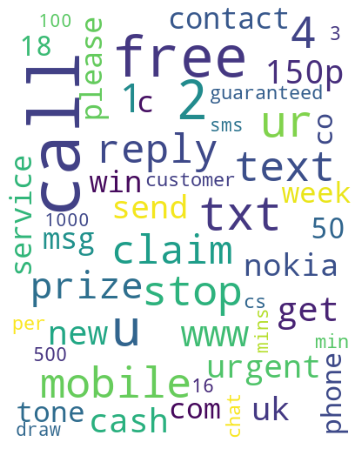

In [226]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')

스팸 메일에는 call, free, mobile과 같은 광고성 문자들이 많음을 볼 수 있다.
또한, claim, prize, stop, www와 같이 링크나 주장글의 특성도 볼 수 있다.
<br><br><br>
가장 빈도수가 높은 call, free, mobile의 유사도를 보면 다음과 같다.

`call`
>('caller', 0.9997968673706055),<br>
 ('calls', 0.9997610449790955),<br>
 ('calling', 0.9997556209564209),<br>
 ('tone', 0.9997312426567078),<br>
 ('collection', 0.9997012615203857),<br>
 ('phone', 0.9996995329856873),<br>
 ('mobile', 0.9996972680091858),<br>
 ('collect', 0.9996756911277771),<br>
 ('ringtone', 0.9996711015701294),<br>
 ('free', 0.9996570348739624)<br><br><br>
 - call의경우 핸드폰과 관련된 단어가 유사도가 높은 것을 볼 수 있다. <br>
`free`
>('call', 0.9996567964553833),<br>
 ('tone', 0.9996396899223328),<br>
 ('caller', 0.9996245503425598),<br>
 ('ringtone', 0.999604344367981),<br>
 ('replying', 0.9995926022529602),<br>
 ('collection', 0.999587893486023),<br>
 ('phone', 0.99958735704422),<br>
 ('reply', 0.9995858073234558),<br>
 ('calling', 0.9995721578598022),<br>
 ('collect', 0.9995555877685547)<br><br><br>
 - free의 경우 call과 관련된 단어가 많음을 볼 수 있다. <br>
`mobile`
>('mobiles', 0.9998627305030823),<br>
 ('mobileupd8', 0.9997732639312744),<br>
 ('call', 0.999697208404541),<br>
 ('tone', 0.9996498823165894),<br>
 ('reply', 0.9996286630630493),
 ('calling', 0.999626636505127),<br>
 ('replying', 0.9996022582054138),<br>
 ('phone', 0.999600350856781),<br>
 ('tones', 0.9995979070663452),<br>
 ('awaiting', 0.9995941519737244)<br><br><br>
 - mobile의 경우 call과 유사도가 높은 단어가 다수 보임을 볼 수 있다.
 
 - 이를 보아 세 단어가 같이 나오는 빈도수가 높음을 추측할 수 있다.